Name: Sanket Chamate

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("SMSSpamCollection.tsv",sep = "\t", header = None)
data.columns = ["label","text"]
data.head() 

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print("input data has {} rows and {} columns".format(len(data),len(data.columns)))

input data has 5572 rows and 2 columns


In [5]:
print("Out of {} rows, data has {} spam and {} ham".format(len(data),len(data[data["label"] == "spam"]),
                                                          len(data[data["label"] == "ham"])))

Out of 5572 rows, data has 747 spam and 4825 ham


In [6]:
print("Number of null in label = {}".format(data["label"].isnull().sum()))
print("Number of null in text = {}".format(data["text"].isnull().sum()))

Number of null in label = 0
Number of null in text = 0


In [7]:
# Preprocessing text data ##########################################################################

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# Remove punctutation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

data["text_clean"] = data["text"].apply(lambda x:remove_punct(x))
data.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [10]:
# Tokenization

import re
def tokenize(text):
    token = re.split("\W",text)
    return token

data["text_tokenized"] = data["text_clean"].apply(lambda x:tokenize(x.lower()))
data.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [11]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(tokenized_list):
    t = [word for word in tokenized_list if word not in stopwords]
    return t

data["text_no_stopwords"] = data["text_tokenized"].apply(lambda x:remove_stopwords(x))
data.head()

,label,text,text_clean,text_tokenized,text_no_stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [12]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Lemmatization
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    t = [wn.lemmatize(word) for word in tokenized_text]
    return t

data["text_lemmatized"] = data["text_no_stopwords"].apply(lambda x:lemmatizing(x))
data.head()

,label,text,text_clean,text_tokenized,text_no_stopwords,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"


In [14]:
# Vectorization ##########################################################################

In [19]:
# TfIdf Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

tfidf_vector = TfidfVectorizer(analyzer = clean_text)
x_tfidf = tfidf_vector.fit_transform(data["text"])

print(x_tfidf.shape)
print(tfidf_vector.get_feature_names())

(5572, 8917)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

In [20]:
# Applying tfidf vectorizer to a smaller sample

data_sample = data[:20]

tfidf_vector_sample = TfidfVectorizer(analyzer = clean_text)
x_tfidf_sample = tfidf_vector_sample.fit_transform(data_sample["text"])

print(x_tfidf_sample.shape)
print(tfidf_vector_sample.get_feature_names())

(20, 221)
['', '08002986030', '08452810075over18s', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6days', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'already', 'amore', 'anymore', 'apply', 'around', 'available', 'b', 'back', 'blessing', 'breather', 'brother', 'buffet', 'bugis', 'c', 'call', 'caller', 'callertune', 'camera', 'cash', 'chance', 'chgs', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copy', 'cost', 'crazy', 'credit', 'cried', 'csh11', 'cup', 'customer', 'darling', 'date', 'dont', 'dun', 'e', 'early', 'eg', 'eh', 'england', 'enough', 'entitled', 'entry', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'gonna', 'got', 'gota', 'granted', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joking', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 

In [21]:
x_tfidf_df = pd.DataFrame(x_tfidf_sample.toarray())
x_tfidf_df.columns = tfidf_vector_sample.get_feature_names()
x_tfidf_df

,,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150,...,wkly,wonderful,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes
0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.251795,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.198423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.170093,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.234097,...,0.000000,0.000000,0.000000,0.185680,0.000000,0.000000,0.234097,0.000000,0.000000,0.000000
6,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.165977,0.0000,0.000000,0.228432,0.000000,0.000000,0.000000,0.0000,0.228432,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.1971,0.000000,0.000000,0.000000,0.000000,0.000000,0.1971,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
# Feature Creation ##########################################################################

In [23]:
data = pd.read_csv("SMSSpamCollection.tsv",sep = "\t", header = None)
data.columns = ["label","text"]
data.head() 

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data["text_length"] = data["text"].apply(lambda x:len(x)-x.count(" "))
data.head()

,label,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",49


In [25]:
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

data["punctuation %"] = data["text"].apply(lambda x:count_punctuation(x))
data.head()

,label,text,text_length,punctuation %
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


In [26]:
import matplotlib.pyplot as plt

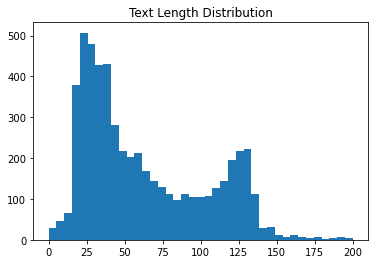

In [27]:
bins = np.linspace(0,200,40)

plt.hist(data["text_length"],bins)
plt.title("Text Length Distribution")
plt.show()

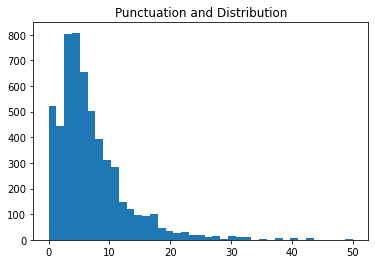

In [28]:
bins = np.linspace(0,50,40)

plt.hist(data["punctuation %"],bins)
plt.title("Punctuation and Distribution")
plt.show()

In [29]:
# Building Machine Learning Classifiers using RandomForest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier
import string

In [31]:
data.head()

,label,text,text_length,punctuation %
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1


In [32]:
x_features = pd.concat([data["text_length"],data["punctuation %"],pd.DataFrame(x_tfidf.toarray())],axis = 1)
x_features.head()

,text_length,punctuation %,0,1,2,3,4,5,6,7,...,8907,8908,8909,8910,8911,8912,8913,8914,8915,8916
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Model using GridSearchCV ##########################################################################

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_features,data["label"],test_size = 0.3,random_state = 0)

In [36]:
def train_randomf(n_est, depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1)
    rf_model = rf.fit(x_train,y_train)
    y_predict = rf_model.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_predict, pos_label = "spam", average = "binary")
    print("Presion = {}, Recall = {}, Accuracy = {}".format(round(precision,3),
                                                           round(recall,3),
                                                           round((y_predict == y_test).sum()/len(y_predict),3)))

In [37]:
for n_est in [10,50,100]:
    for depth in [10,20,30]:
        train_randomf(n_est, depth)

Presion = 1.0, Recall = 0.308, Accuracy = 0.908
Presion = 1.0, Recall = 0.602, Accuracy = 0.947
Presion = 1.0, Recall = 0.656, Accuracy = 0.955
Presion = 1.0, Recall = 0.208, Accuracy = 0.895
Presion = 1.0, Recall = 0.579, Accuracy = 0.944
Presion = 1.0, Recall = 0.715, Accuracy = 0.962
Presion = 1.0, Recall = 0.199, Accuracy = 0.894
Presion = 1.0, Recall = 0.575, Accuracy = 0.944
Presion = 1.0, Recall = 0.692, Accuracy = 0.959
